# Covariance Matrix Adaptation Evolution Strategy (CMA-ES)

pycma package

minimize a function as a non-parameterized method

In [1]:
! pip install git+https://github.com/CMA-ES/pycma.git@master

  Cloning https://github.com/CMA-ES/pycma.git (to revision master) to /tmp/pip-req-build-cw2p3fk0
  Running command git clone -q https://github.com/CMA-ES/pycma.git /tmp/pip-req-build-cw2p3fk0
  Created wheel for cma: filename=cma-3.0.4-cp36-none-any.whl size=229850 sha256=230c333f958b886e9723e039f1b331cdfd06f39d906869700d08930f82a894d3
  Stored in directory: /tmp/pip-ephem-wheel-cache-m94bdngf/wheels/8f/34/1b/7ceefd352adbab78795a433740b92948bc426914ae8f8c58a0
Successfully built cma
You should consider upgrading via the 'pip install --upgrade pip' command.


In [24]:
# usage example 1
# usage check: http://cma.gforge.inria.fr/html-pythoncma/frames.html
import cma
var_dim = 2
mean_ini = 0.
std_ini = 0.5
func = lambda x: x[0]**2+(x[1]-2)**2  # input variable of function needs to be a list or np.ndarray
res = cma.fmin(func, var_dim * [mean_ini], std_ini)
print('Result: \n', res[0], '\n')
print(res[1])

(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=744826, Fri Dec 11 14:42:58 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 1.501306362586282e+00 1.0e+00 5.47e-01  5e-01  6e-01 0:00.0
    2     12 1.525044423369983e-01 1.3e+00 6.60e-01  5e-01  9e-01 0:00.0
    3     18 1.384594006161812e-01 1.8e+00 7.17e-01  5e-01  1e+00 0:00.0
   76    456 1.684255898362304e-16 1.4e+00 2.15e-05  4e-08  4e-08 0:00.1
termination on tolfun=1e-11 (Fri Dec 11 14:42:58 2020)
final/bestever f-value = 2.894516e-16 1.567932e-16
incumbent solution: [-1.383911646557508e-08, 2.0000000098959805]
std deviation: [3.770083754765616e-08, 4.003056513826481e-08]
Result: 
 [7.99003923e-09 1.99999999e+00] 

1.5679318715738708e-16


In [14]:
# usage example 2
import cma
var_dim = 2
mean_ini = 0.
std_ini = 0.5
es = cma.CMAEvolutionStrategy(var_dim * [mean_ini], std_ini)
# help(es)
func = lambda x: x[0]**2+(x[1]-2)**2  # input variable of function needs to be a list or np.ndarray
es.optimize(func)
es.result_pretty()

(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=712365, Fri Dec 11 13:50:13 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 3.501118073913435e+00 1.0e+00 4.18e-01  3e-01  4e-01 0:00.0
    2     12 2.800401479158568e+00 1.2e+00 5.09e-01  5e-01  5e-01 0:00.0
    3     18 2.603067827064534e+00 1.9e+00 5.34e-01  5e-01  5e-01 0:00.0
   84    504 5.943814210656306e-18 1.1e+00 4.25e-05  4e-08  6e-08 0:00.1
termination on tolfun=1e-11
final/bestever f-value = 5.943814e-18 5.943814e-18
incumbent solution: [6.679373396249824e-09, 1.9999999970894826]
std deviation: [4.446662475552633e-08, 5.517993430755085e-08]


CMAEvolutionStrategyResult(xbest=array([-2.53588447e-10,  2.00000000e+00]), fbest=5.943814210656306e-18, evals_best=503, evaluations=504, iterations=84, xfavorite=array([6.6793734e-09, 2.0000000e+00]), stds=array([4.44666248e-08, 5.51799343e-08]), stop={'tolfun': 1e-11})

termination on tolfun=1e-11
final/bestever f-value = 5.943814e-18 5.943814e-18
incumbent solution: [6.679373396249824e-09, 1.9999999970894826]
std deviation: [4.446662475552633e-08, 5.517993430755085e-08]
Help on function plot in module cma.logger:

plot(name=None, fig=None, abscissa=1, iteridx=None, plot_mean=False, foffset=1e-19, x_opt=None, fontsize=7, downsample_to=3000.0, xsemilog=None, addcols=0, **kwargs)
    plot data from files written by a `CMADataLogger`,
    the call ``cma.plot(name, **argsdict)`` is a shortcut for
    ``cma.CMADataLogger(name).plot(**argsdict)``
    
    Arguments
    ---------
    `name`
        name of the logger, filename prefix, None evaluates to
        the default 'outcma/cma'
    `fig`
        filename or figure number, or both as a tuple (any order)
    `abscissa`
        0==plot versus iteration count,
        1==plot versus function evaluation number
    `iteridx`
        iteration indices to plot
    `x_opt`
        if ``len(x_opt) == dimension`

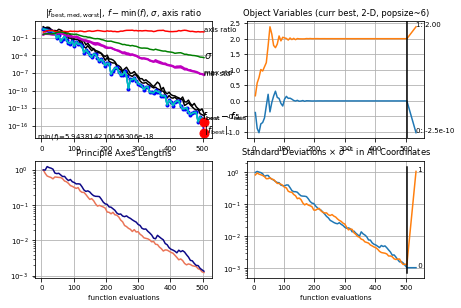

In [19]:
# usage example 3
import cma
var_dim = 2
mean_ini = 0.
std_ini = 0.5
es = cma.CMAEvolutionStrategy(var_dim * [mean_ini], std_ini)
while not es.stop():
     solutions = es.ask()
     es.tell(solutions, [func(x) for x in solutions])
     es.logger.add()  # write data to disc to be plotted
     es.disp()
es.result_pretty()
help(cma.plot)
cma.plot()  # shortcut for es.logger.plot()